In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
##read the data 
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

In [4]:
#descriptive information
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
#correlation
corr=df.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot: >

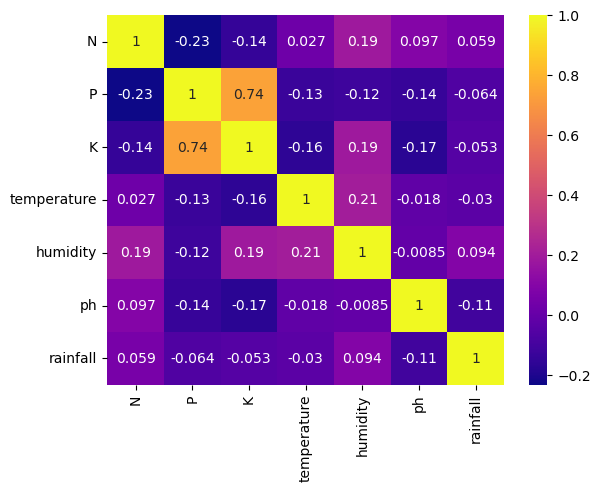

In [6]:
#correlation visualization
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')

In [7]:
[feature for  feature in df.columns]

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

<AxesSubplot: xlabel='rainfall', ylabel='Count'>

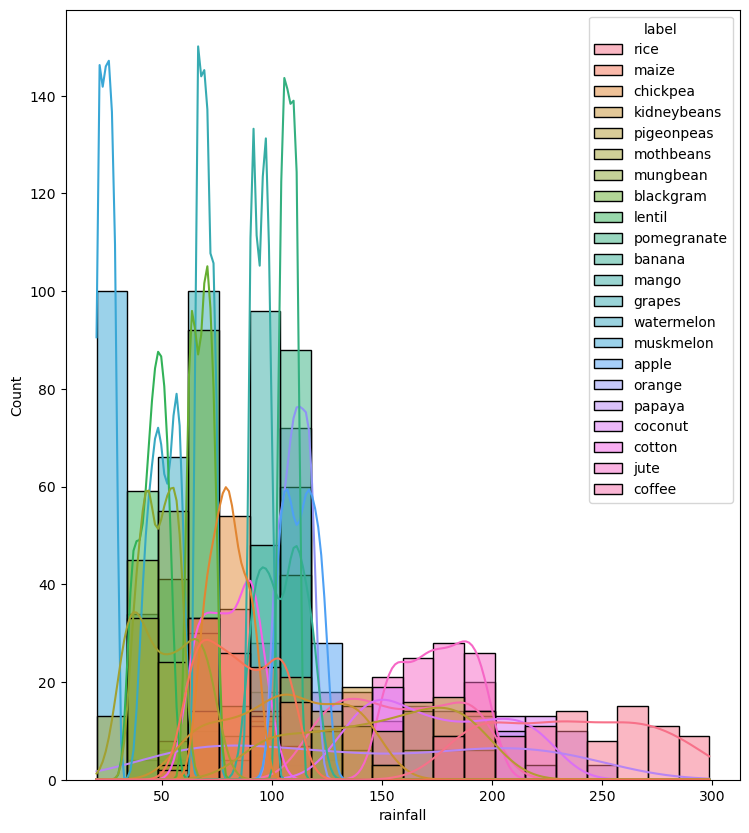

In [8]:
plt.subplots(1,1,figsize=(40,10))
plt.subplot(141)
sns.histplot(data=df,x='rainfall',bins=20,kde=True,hue='label')

<AxesSubplot: xlabel='N', ylabel='Count'>

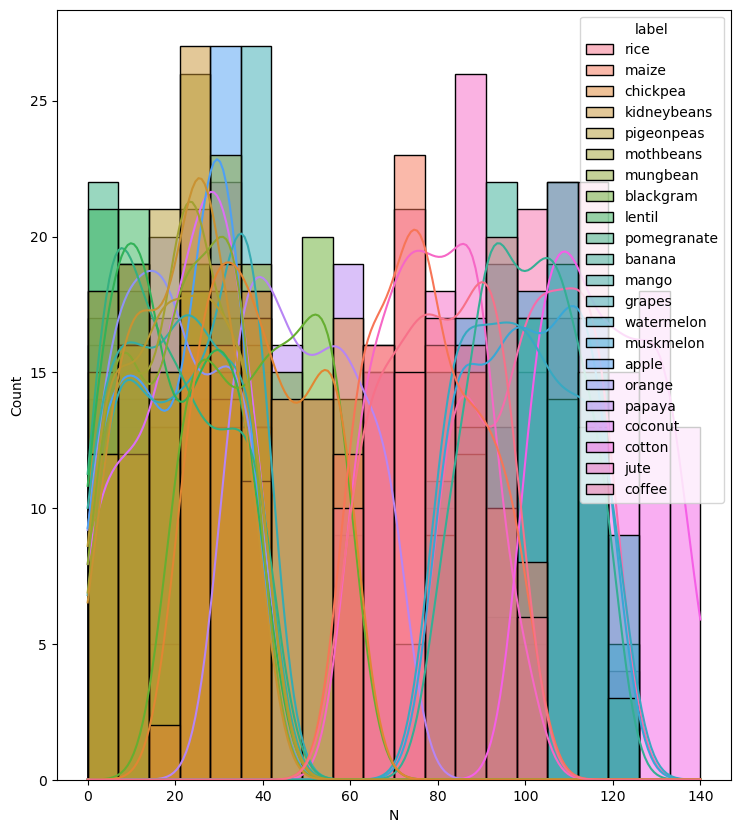

In [9]:
plt.subplots(1,1,figsize=(40,10))
plt.subplot(141)
sns.histplot(data=df,x='N',bins=20,kde=True,hue='label')


<AxesSubplot: xlabel='rainfall', ylabel='label'>

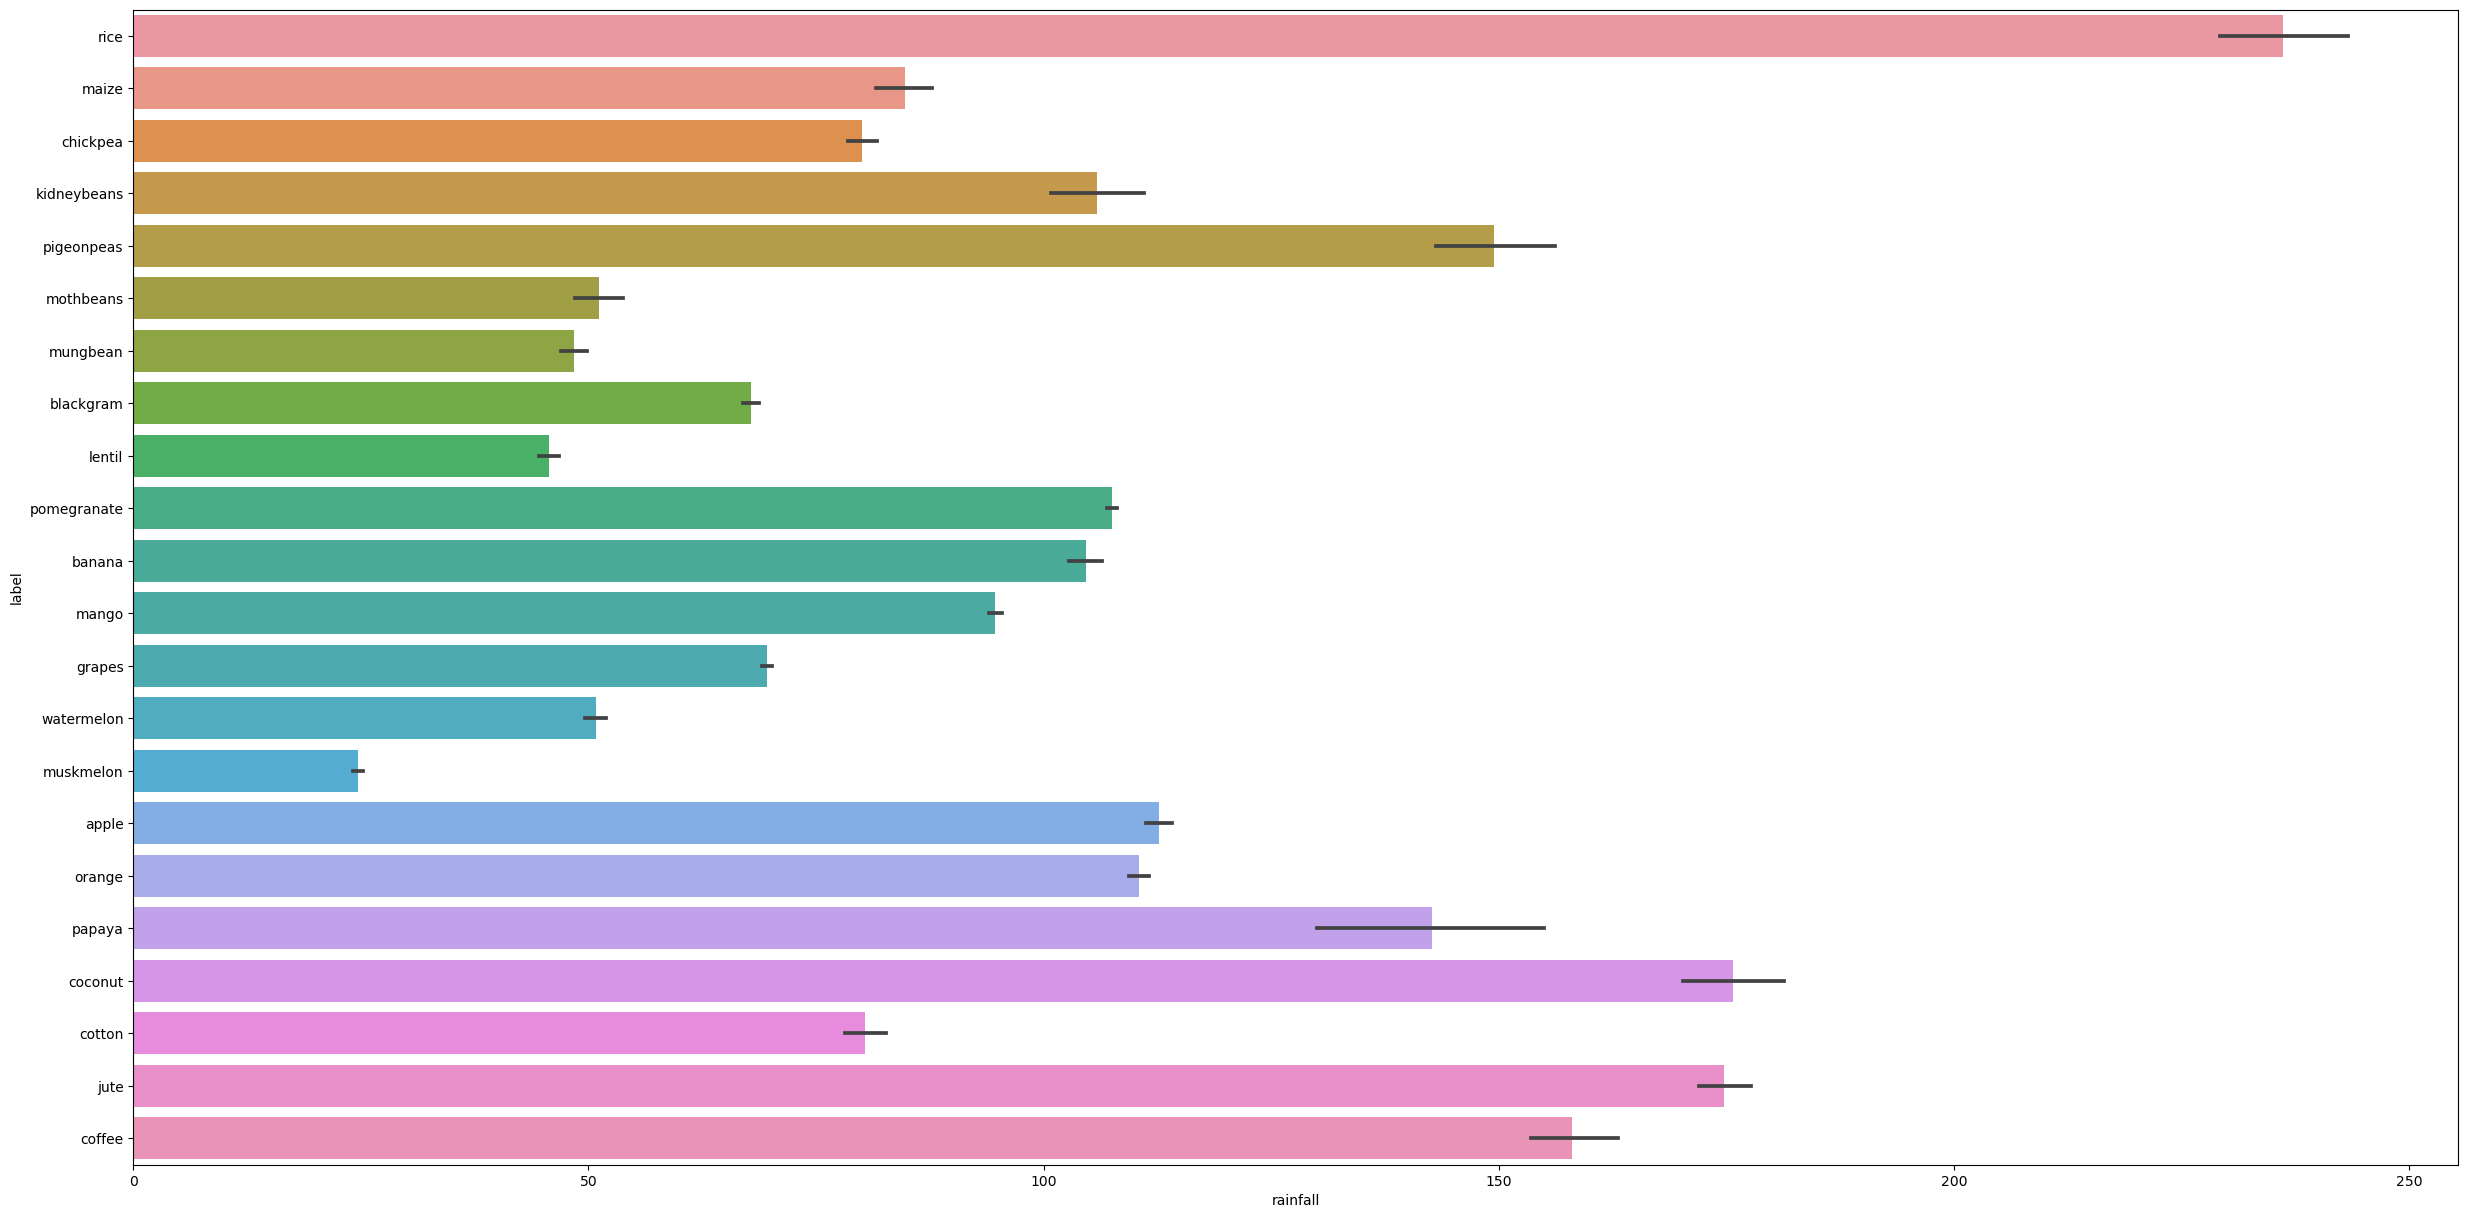

In [10]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'rainfall' , y = 'label')


<AxesSubplot: xlabel='ph', ylabel='label'>

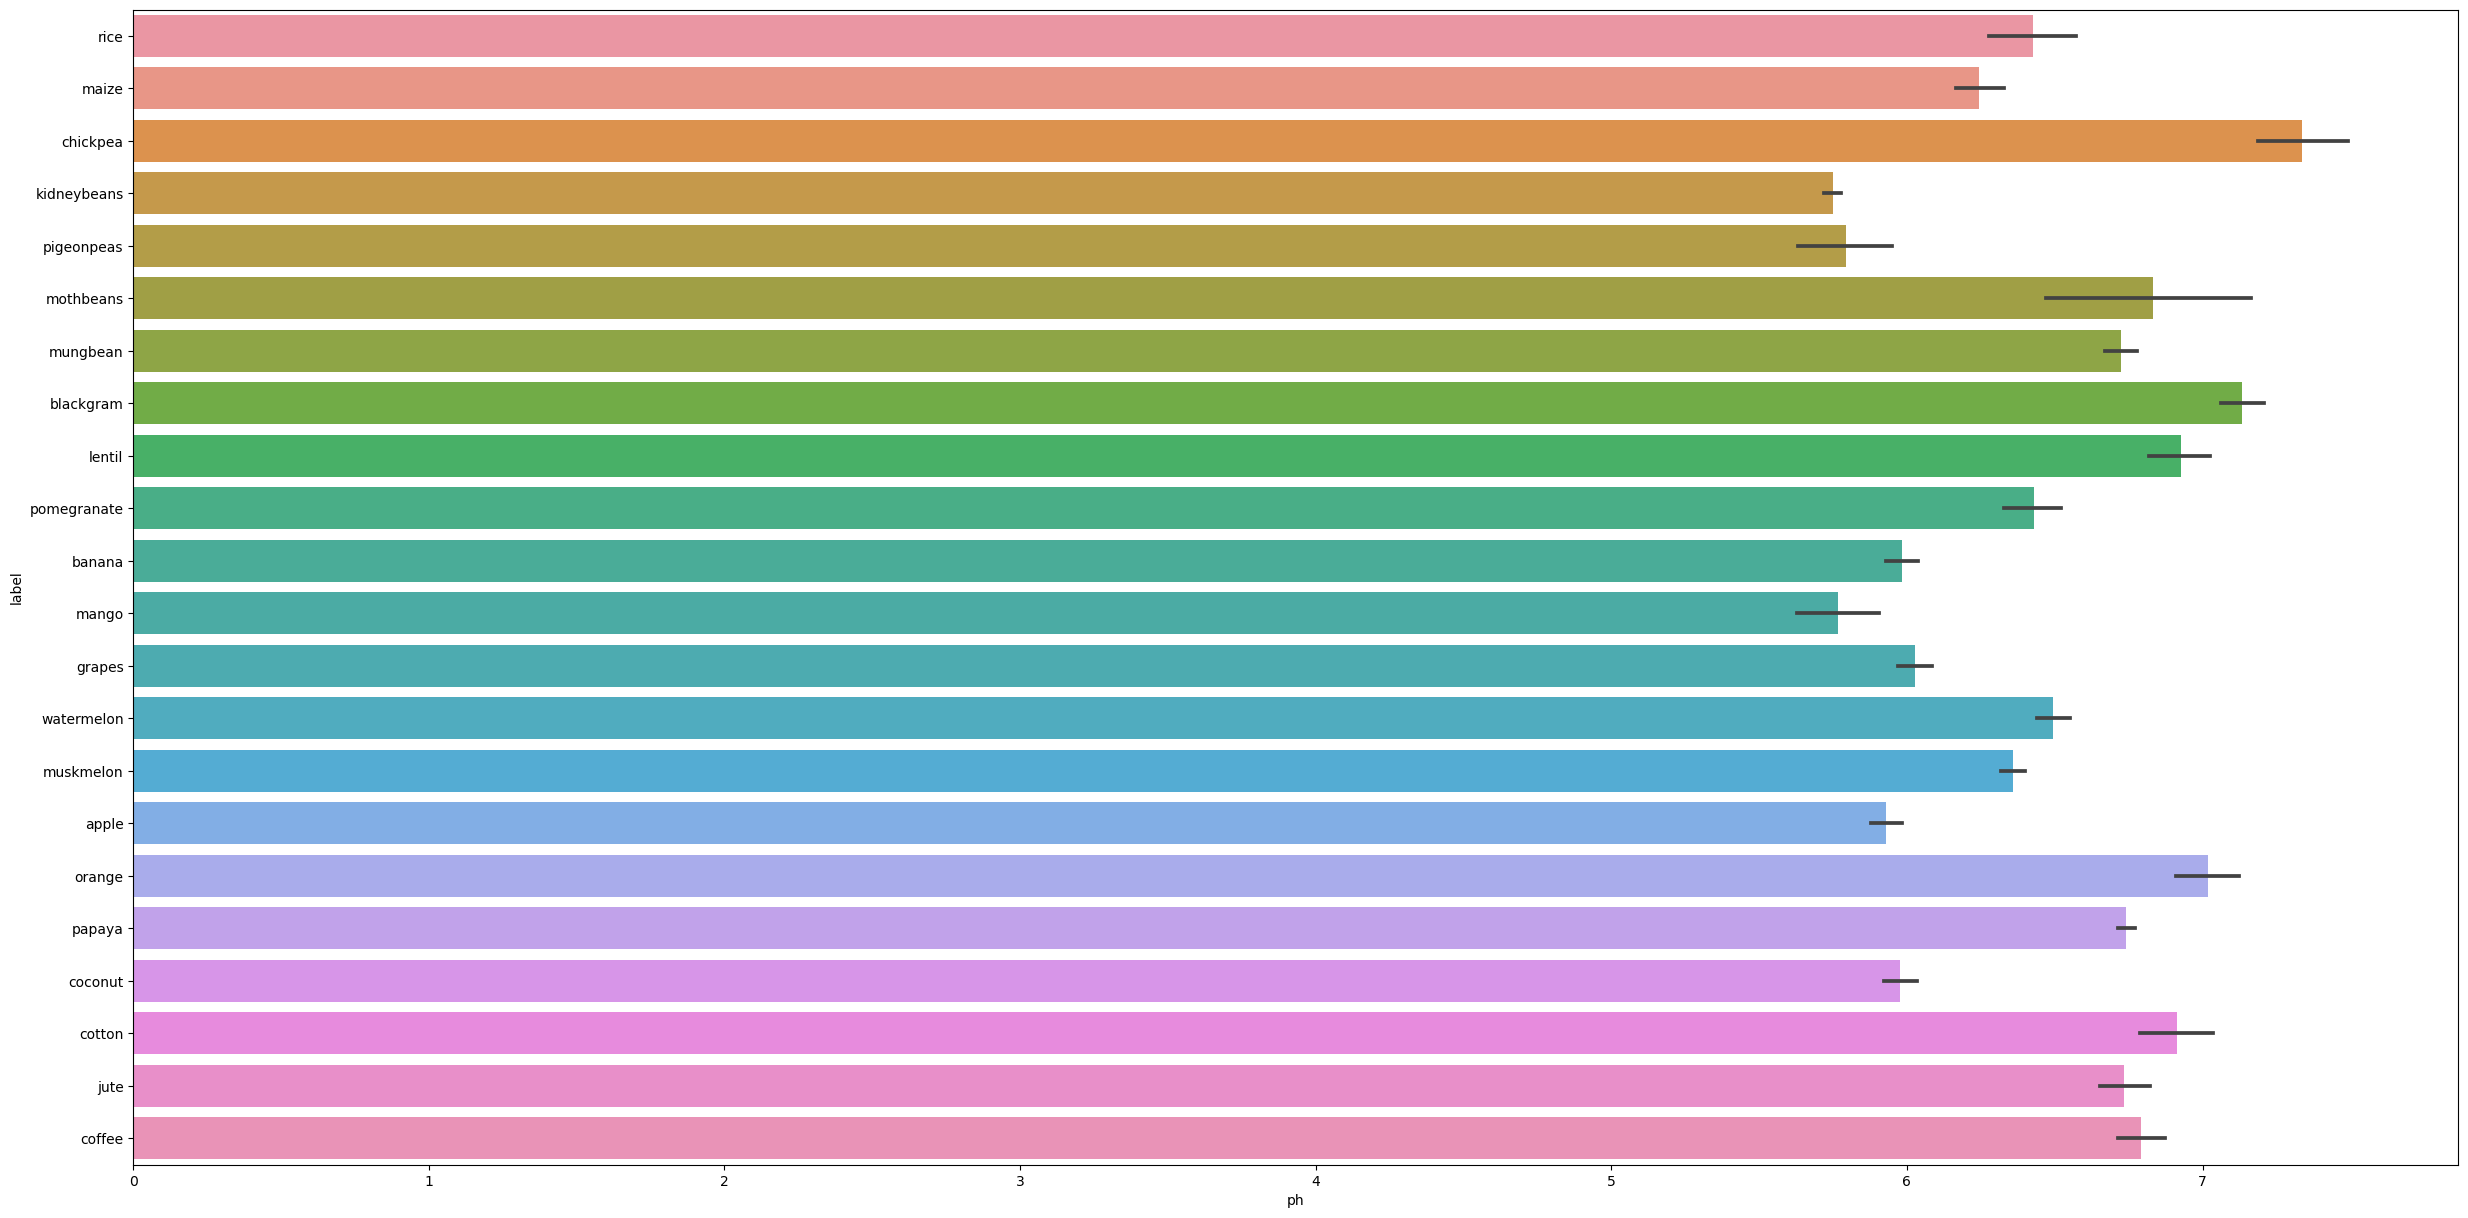

In [11]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'ph' , y = 'label')

<AxesSubplot: xlabel='N', ylabel='label'>

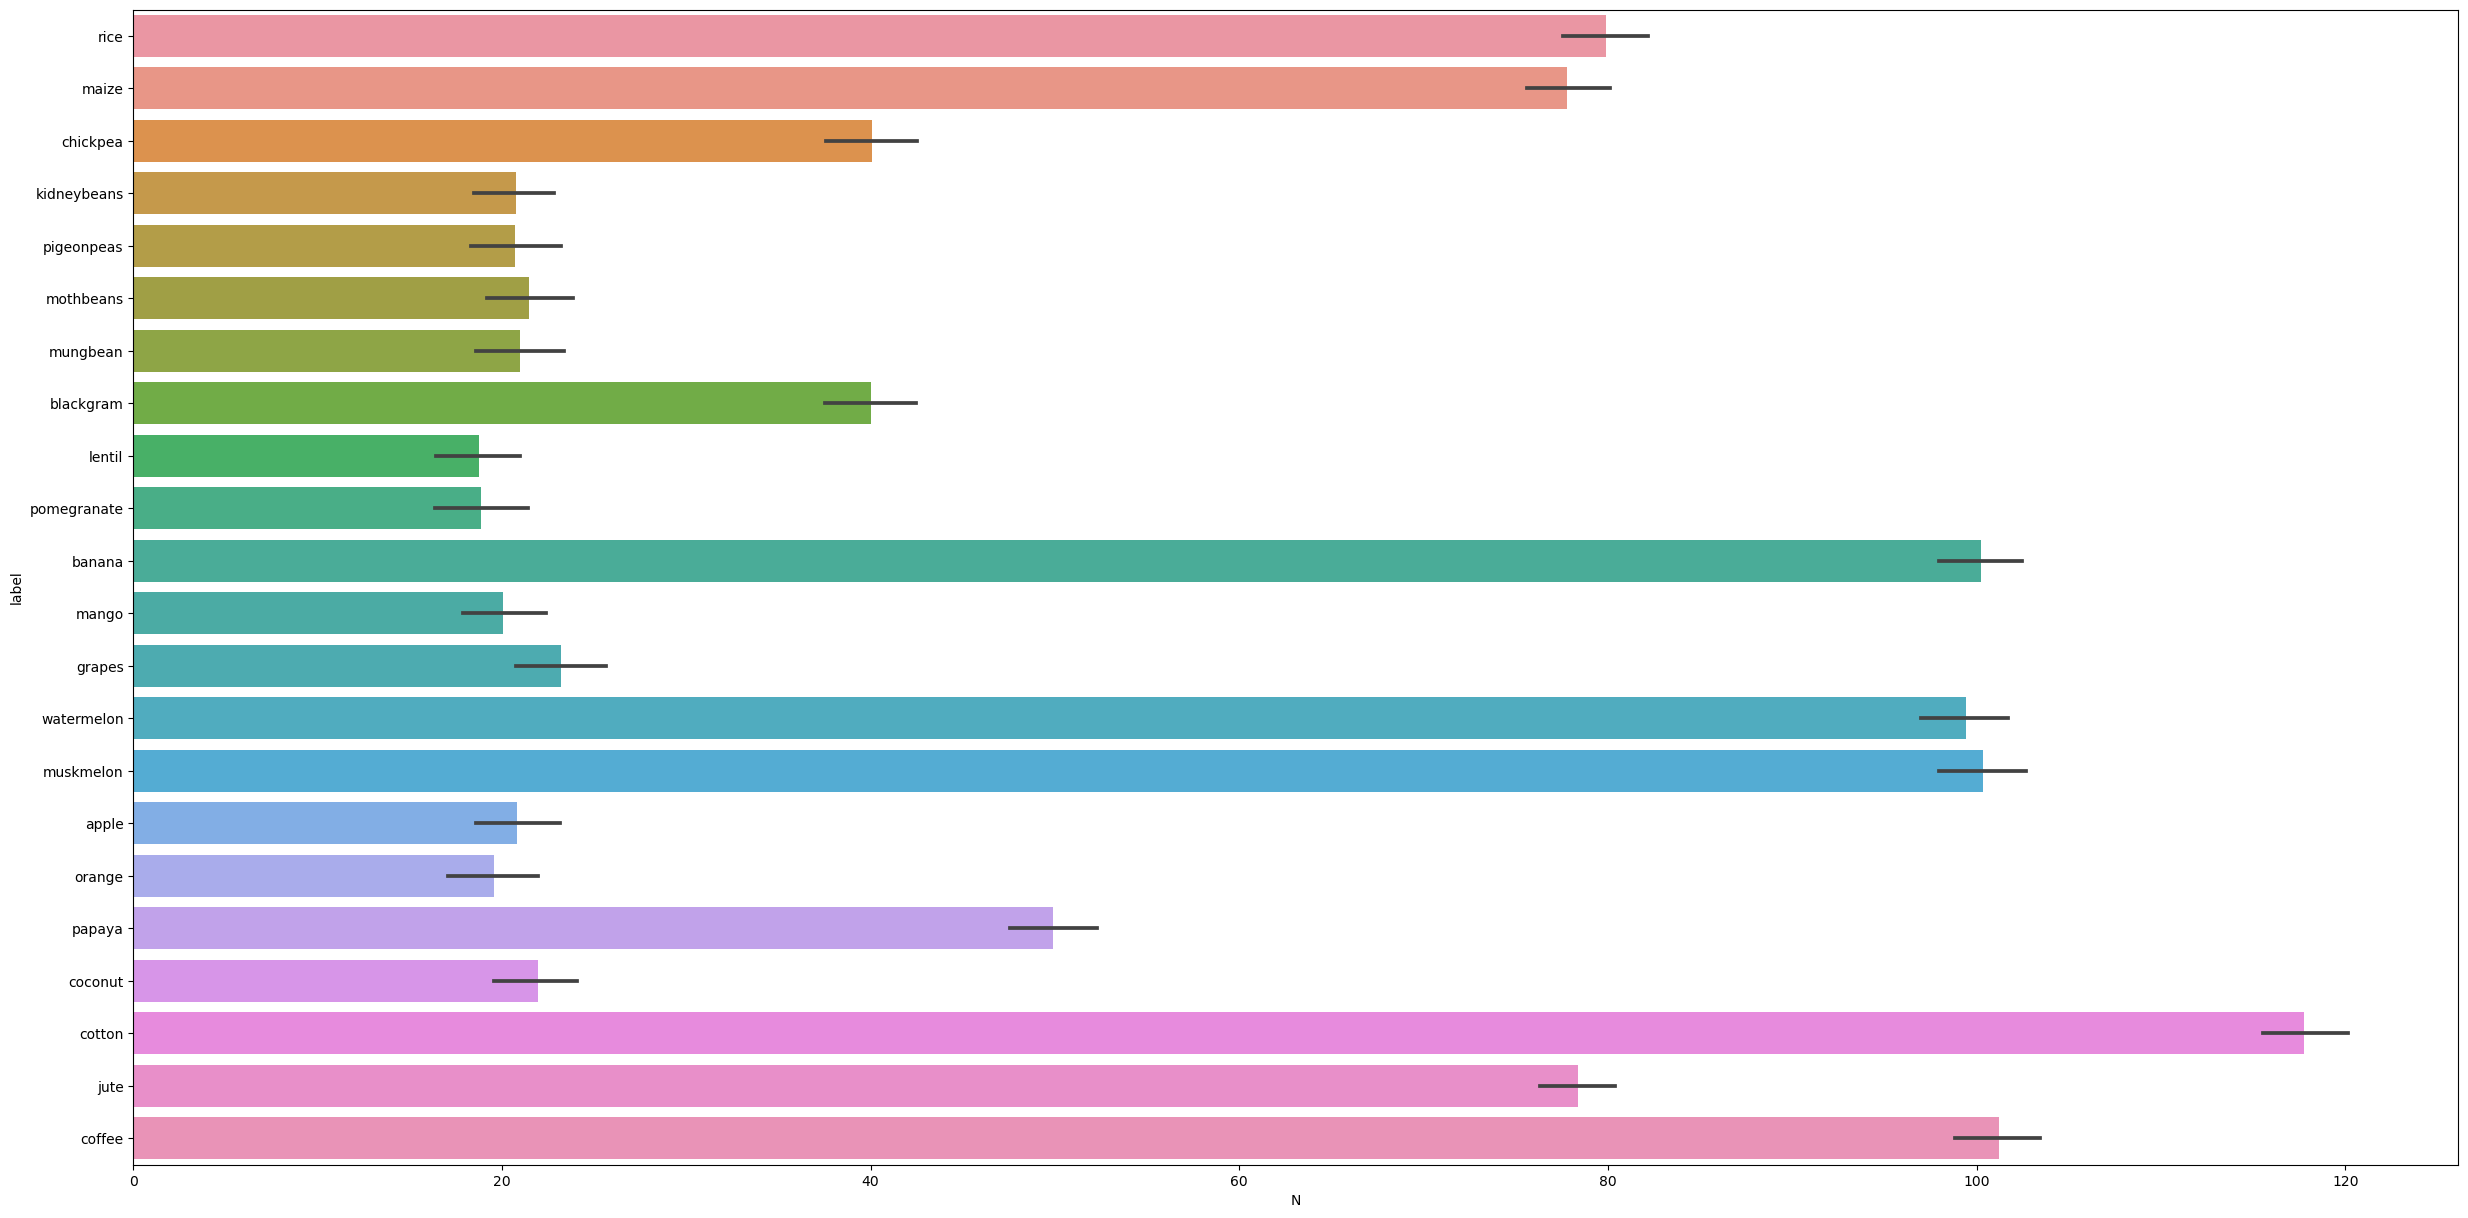

In [12]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'N' , y = 'label')

<AxesSubplot: xlabel='K', ylabel='label'>

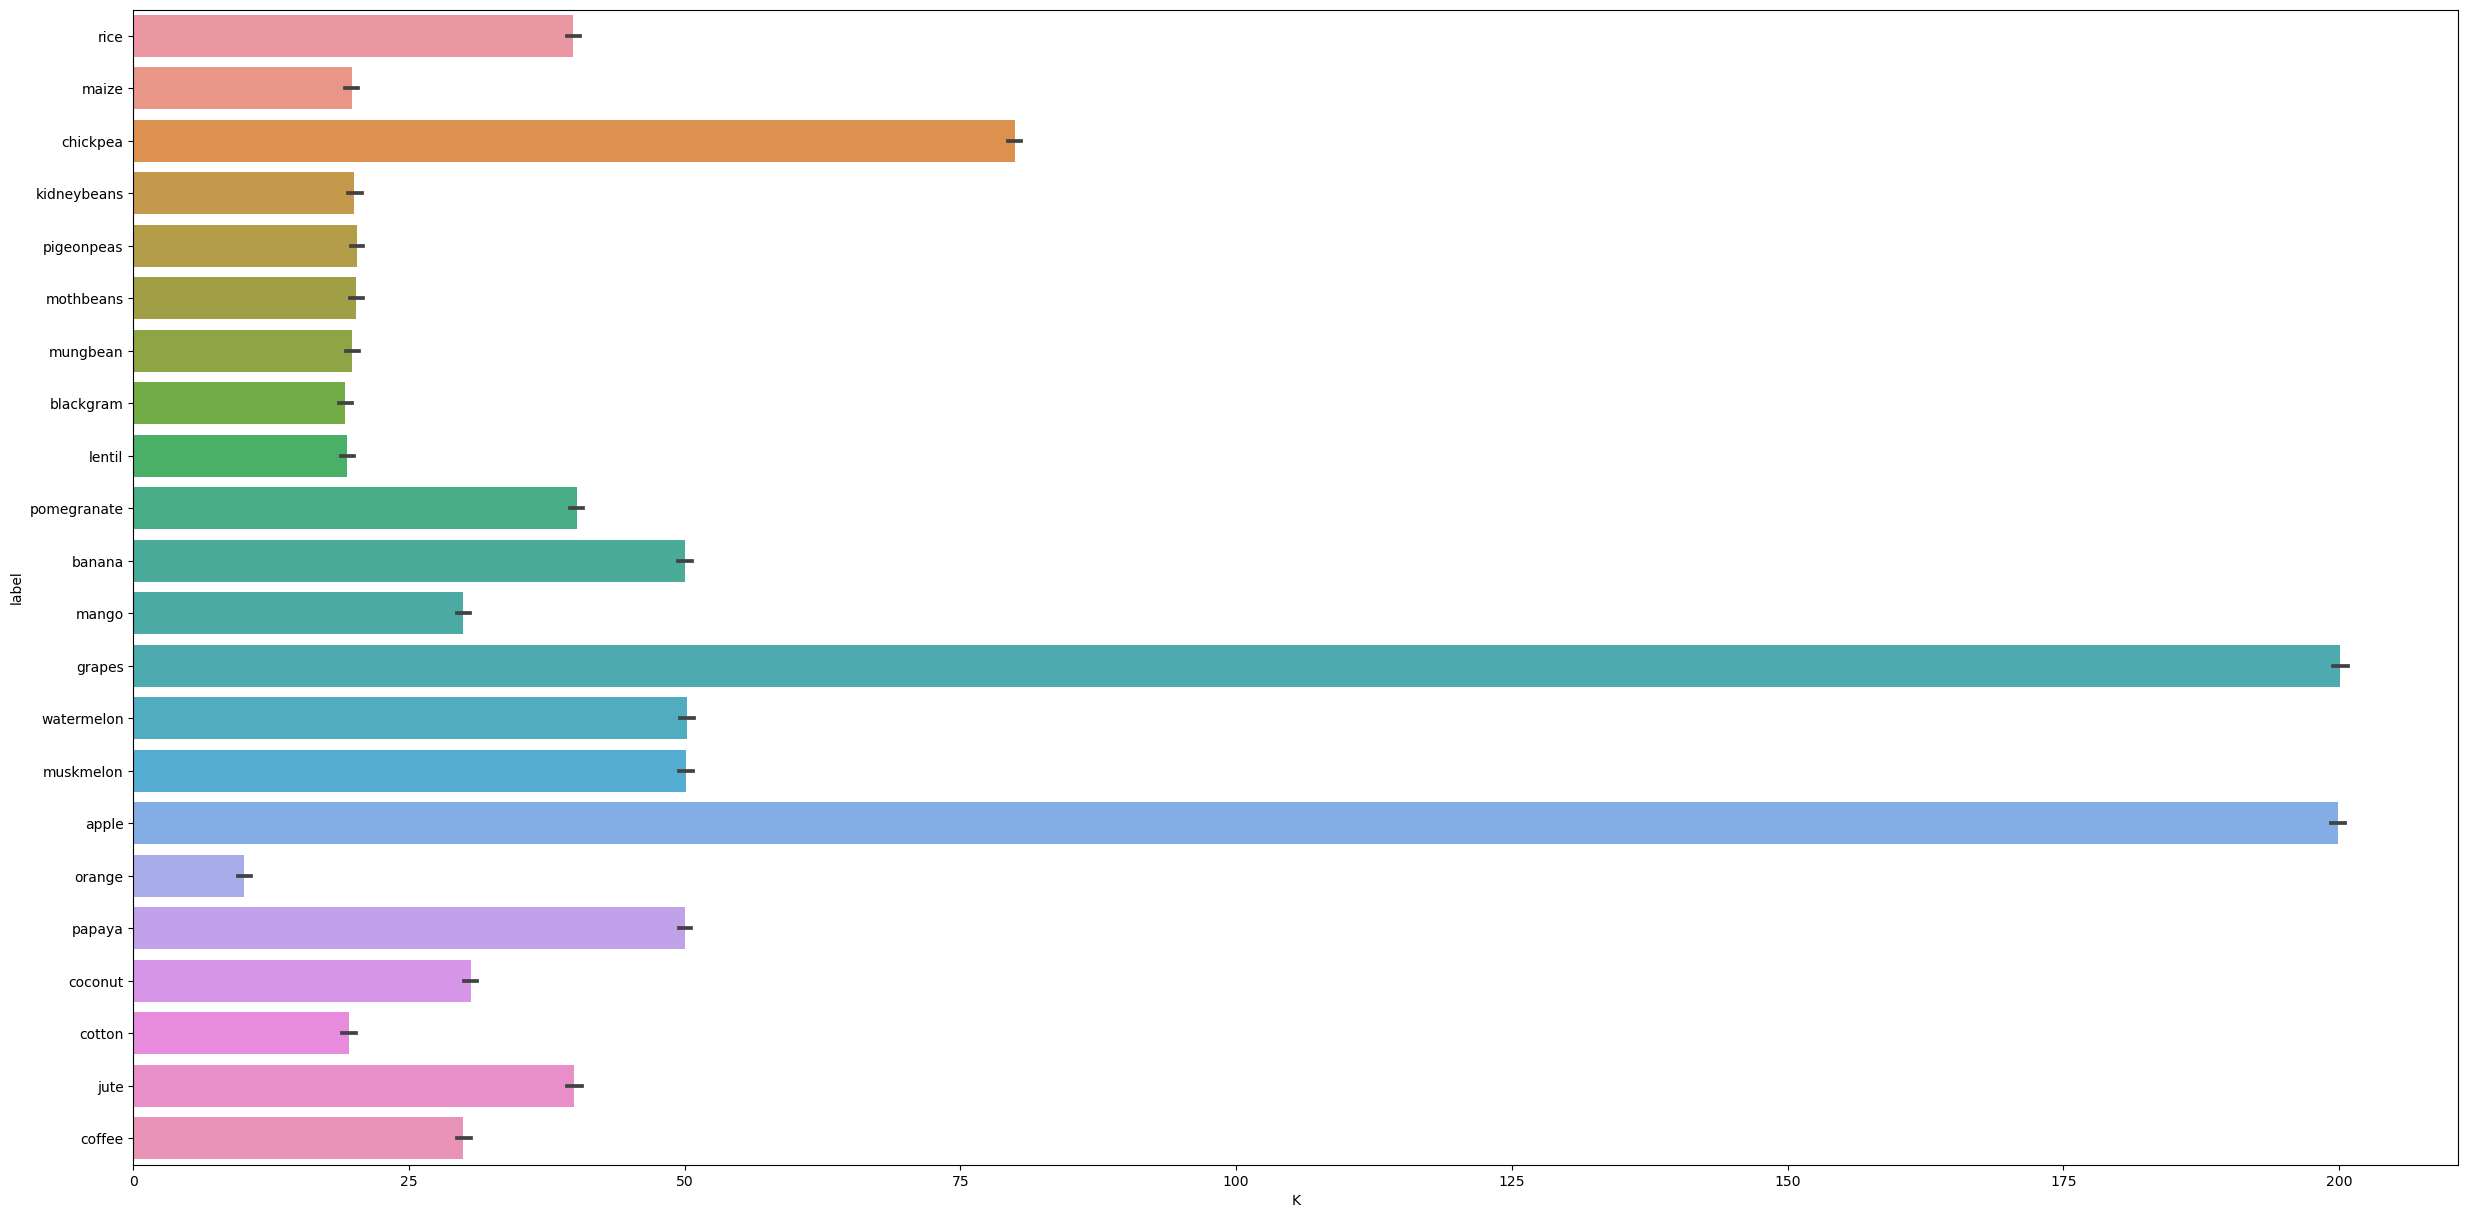

In [13]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'K' , y = 'label')

<AxesSubplot: xlabel='rainfall', ylabel='Density'>

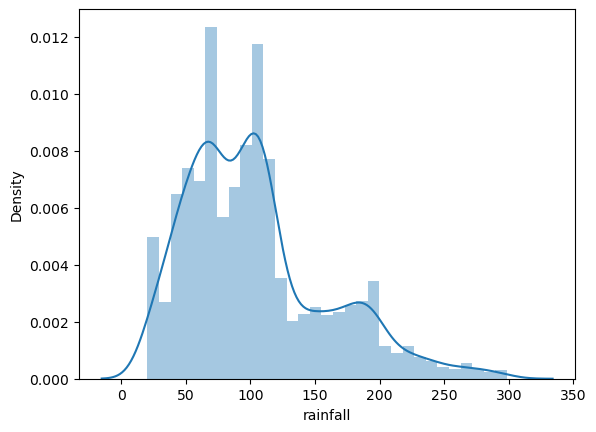

In [14]:
sns.distplot(df['rainfall'])

In [15]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [16]:
label_dict={
   'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22



}

df['crop']=df['label'].map(label_dict)

In [17]:
##drop categorical column
df.drop('label',axis=1,inplace=True)

In [18]:
##new dataframe
df.head(200)

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
195,90,57,24,18.928519,72.800861,6.158860,82.341629,2
196,67,35,22,23.305468,63.246480,6.385684,108.760300,2
197,60,54,19,18.748267,62.498785,6.417820,70.234016,2
198,83,58,23,19.742133,59.662631,6.381202,65.508614,2


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [20]:
X = df.drop('crop', axis = 1)
y = df['crop']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
xtrain.shape

(1760, 7)

In [22]:
xtest.shape

(440, 7)

In [23]:
xtrain

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [24]:
##STANDARDIZATION:mean of all data is zero and std deviation is 1..
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

std.fit(xtrain)
xtrain=std.transform(xtrain)
xtest=std.transform(xtest)

In [25]:
xtrain

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [27]:
 #List of algorithms
algorithms = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
]

# Iterate through each algorithm
for model in algorithms:
    model.fit(xtrain, ytrain)  # Fit the model
    ypred = model.predict(xtest)  # Make predictions
    acc = accuracy_score(ytest, ypred)  # Evaluate accuracy
    print(f"{model.__class__.__name__} accuracy: {acc}")

LogisticRegression accuracy: 0.9636363636363636
DecisionTreeClassifier accuracy: 0.9863636363636363
RandomForestClassifier accuracy: 0.9931818181818182
GaussianNB accuracy: 0.9954545454545455
SVC accuracy: 0.9681818181818181
KNeighborsClassifier accuracy: 0.9590909090909091
GradientBoostingClassifier accuracy: 0.9818181818181818
AdaBoostClassifier accuracy: 0.1409090909090909


In [28]:
# Initialize the Random Forest Classifier
rf_classifier = GaussianNB()

# Train the model on the training data
rf_classifier.fit(xtrain, ytrain)

# Make predictions on the test data
predictions = rf_classifier.predict(xtest)

In [33]:
#making recommendaion on new data...
def recommend(N,P,K,temperature,ph,humidity,rainfall):
    features=np.array([[N,P,K,temperature,ph,humidity,rainfall]])
    prediction=rf_classifier.predict(features).reshape(1,-1)
    
    return prediction[0]



N=float(input("N(0 to 140)kg/hec:"))
P=float(input("P(5 to 145)kg/hec:"))
K=float(input("K(5 to 205)kg/hec:"))
temperature=float(input("temperature(9 to 43)in celcius:"))
humidity=float(input("humidity(15 to 97 ) in %:"))
rainfall=float(input("rainfall(20 to 298) in mm/year:"))
ph=float(input("ph (4 to 9):"))

predict=recommend(N,P,K,temperature,ph,humidity,rainfall)



N(0 to 140)kg/hec: 67
P(5 to 145)kg/hec: 67
K(5 to 205)kg/hec: 67
temperature(9 to 43)in celcius: 43
humidity(15 to 97 ) in %: 67
rainfall(20 to 298) in mm/year: 67
ph (4 to 9): 9


In [34]:
print(predict)

[13]


In [31]:
crop={1:'rice',2:'maize',3:'jute',4:'cotton',5:'coconut',6:'papaya',7:'orange',
            8:'apple',9:'muskmelon',10:'watermelon',11:'grapes',12:'mango',13:'banana',
            14:'pemogranate',15:'lentil',16:'blackgram',17:'mungbean',18:'mothbeans',
            19:'pigeonpeas',20:'kidneybeans',21:'chickpea',22:'coffee'}
   

In [35]:
if predict[0] in crop:
    print(crop[predict[0]])

banana
